In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
# Parameters for GBM
dt = 1/252
S_0 = 11510.46 #Price of SMI at 6 Aug 2024
inital_price = 11130.44
r = 0.01
Nsim = 1000
N = 258 #Number of business days from 6 Aug 2024 to 18 Aug 2025
sigma = 0.136 

In [6]:
def GBM(sigma, N,  S_0 , r = 0.01 , Nsim = 10000):
    # Create a 2D array to store the stock prices for each simulation
    S = np.zeros([Nsim,N])
    S[:,0] = S_0

    for i in range(Nsim):
        for j in range(N-1):
            Z = np.random.normal(0, 1)      
            # Calculate the stock price at time t+1 using the Geometric Brownian Motion model with risk-free interet rate
            S[i,j+1] = S[i,j] * np.exp( (r - 0.5 * sigma ** 2) * dt + sigma * Z * np.sqrt(dt) )
    return S

In [7]:
def GBM_AV(sigma, N,  S_0, r = 0.01 , Nsim = 10000):
    # Create a 2D array to store the stock prices for each simulation
    S = np.zeros([Nsim,N])
    S[:,0] = S_0

    for i in range(Nsim//2):
        for j in range(N-1):
            Z = np.random.normal(0, 1)      
            # Calculate the stock price at time t+1 using the Geometric Brownian Motion model with risk-free interet rate
            S[2*i,j+1] = S[2*i,j] * np.exp( (r - 0.5 * sigma ** 2) * dt + sigma * Z * np.sqrt(dt) )
            S[2*i+1,j+1] = S[2*i+1,j] * np.exp( (r - 0.5 * sigma ** 2) * dt + sigma * -Z * np.sqrt(dt) )

    return S

In [8]:
#Payoff function for the derivative given a price path
def payoff(price_path, barrier_price = 6566.9596, initial_price = 11130.44):
    barrier_hit = min(price_path) <= barrier_price
    asset_final_price = price_path[-1]

    if barrier_hit:
        return 1000 * (asset_final_price / initial_price)
    else:
        return 1000 * max(1, 1 + 1.25 * (asset_final_price / initial_price - 1))

In [9]:
# Payoff for a given set of simulations
def payoff_sim(S, barrier_price = 6566.9596, initial_price = 11130.44):
    num_simulations = S.shape[0]
    payoff_values = np.zeros(num_simulations)
    for i in range(num_simulations):
        # Need to discount the payoff to present value
        payoff_values[i] = math.exp(-r*N*dt) * payoff(S[i,:], barrier_price, initial_price)
    return payoff_values

In [21]:
# Set a seed for reproducibility
np.random.seed(3333)
S = GBM(sigma, N, S_0)
# S_AV = GBM_AV(sigma, N, S_0)


Text(0.5, 1.0, 'Stock price simulation using Geometric Brownian Motion')

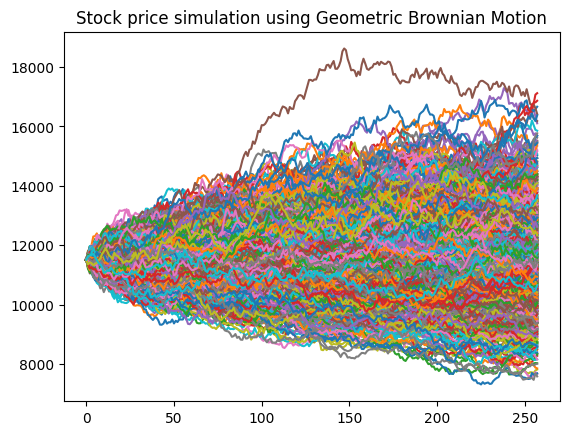

In [23]:
t = range(N)
for i in range(Nsim):
    plt.plot(t, S[i])
plt.title('Stock price simulation using Geometric Brownian Motion')

In [50]:
value = sorted(S[:,-1])
print(value[-100:])
# print('The 95% quantile of the final stock price is:', value[Nsim//20])
middle = value[10000//20:19*10000//20]
payoff_arr = np.zeros(10000)
# convert array to numpy array
for i in range(len(middle)):
    payoff_arr = payoff([middle[i]]) * math.exp(-r*N*dt)
print(np.mean(payoff_arr))


# print('The 5% quantile of the final stock price is:', value[19*10000//20])
count  = 0
for i in range(10000):
    if S[i,-1] >= S_0:
        count+=1
print(count)

[np.float64(15910.698111342032), np.float64(15911.347036998342), np.float64(15913.656059902265), np.float64(15916.513470386715), np.float64(15922.220397636058), np.float64(15928.004685841583), np.float64(15928.12413410265), np.float64(15930.92760906234), np.float64(15939.21397974942), np.float64(15940.866243827513), np.float64(15951.270669705807), np.float64(15980.044765616256), np.float64(15985.011269808807), np.float64(16013.134771962958), np.float64(16019.804433035117), np.float64(16024.599615985062), np.float64(16037.690965122554), np.float64(16056.470468645084), np.float64(16056.776477207686), np.float64(16057.983380196421), np.float64(16063.314646546101), np.float64(16070.334199779389), np.float64(16078.048713037477), np.float64(16079.708733314259), np.float64(16105.501317541117), np.float64(16117.61338828316), np.float64(16139.093685666989), np.float64(16141.87068704015), np.float64(16152.392181992793), np.float64(16180.037197106512), np.float64(16185.74599701226), np.float64(16

Text(0.5, 1.0, 'Stock price simulation using Geometric Brownian Motion with Antithetic Variates')

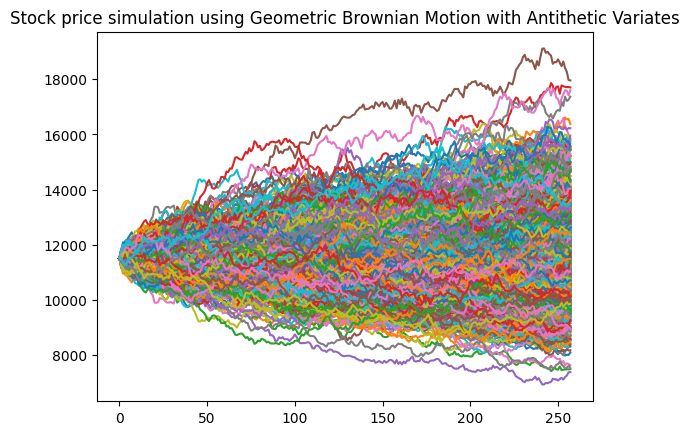

In [ ]:
t = range(N)
for i in range(Nsim):
    plt.plot(t, S_AV[i])
plt.title('Stock price simulation using Geometric Brownian Motion with Antithetic Variates')

In [ ]:
def gbm_SS(sigma, N, S_0, num_bins = 5, r = 0.01 , Nsim = 10000, barrier_price = 6566.9596):
    # Create a 2D array to store the stock prices for each simulation
    S = np.zeros([Nsim,N])
    S[:,0] = S_0

    for i in range(Nsim//num_bins):
        Z = np.random.normal(0, 1)
        for k in range(num_bins):
            S[num_bins*i+k,1] = S[num_bins*i+k,0] * np.exp( (r - 0.5 * sigma ** 2) * dt + sigma * (Z+k)/num_bins * np.sqrt(dt) )

    for i in range(Nsim):   
        for j in range(1,N-1):
            Z = np.random.normal(0, 1)
            # Calculate the stock price at time t+1 using the Geometric Brownian Motion model with risk-free interet rate
            S[i,j+1] = S[i,j] * np.exp( (r - 0.5 * sigma ** 2) * dt + sigma * Z * np.sqrt(dt) )
    return S

In [ ]:
S_SS = gbm_SS(sigma, N, S_0)

Text(0.5, 1.0, 'Stock price simulation using Geometric Brownian Motion with SS')

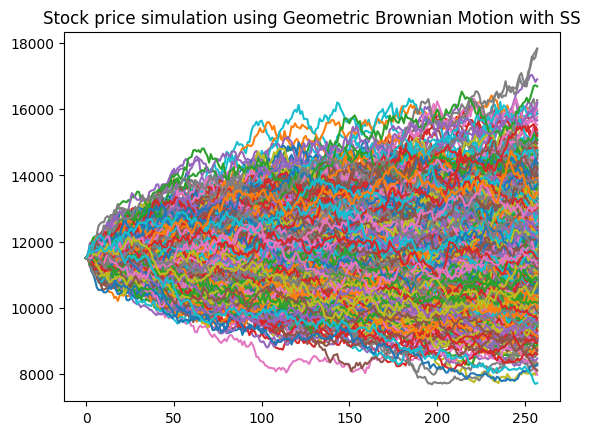

In [ ]:

t = range(N)
for i in range(Nsim):
    plt.plot(t, S_SS[i])
plt.title('Stock price simulation using Geometric Brownian Motion with SS')

In [25]:
derivative_price = payoff_sim(S)
derivative_price_AV = payoff_sim(S_AV)
derivative_price_SS = payoff_sim(S_SS)


NameError: name 'S_SS' is not defined

In [26]:
print(derivative_price.mean(), derivative_price_AV.mean(), derivative_price_SS.mean())

NameError: name 'derivative_price_SS' is not defined

In [27]:
print(derivative_price.mean())

1088.4594979372007
